# 1. Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 2. Setting Up Kaggle Import

In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d gauravduttakiit/resume-dataset

Dataset URL: https://www.kaggle.com/datasets/gauravduttakiit/resume-dataset
License(s): CC0-1.0
100% 383k/383k [00:00<00:00, 556kB/s]
100% 383k/383k [00:00<00:00, 556kB/s]


In [ ]:
!unzip resume-dataset.zip

Archive:  resume-dataset.zip
  inflating: UpdatedResumeDataSet.csv  


# 3. Loading Data

In [ ]:
df = pd.read_csv('/content/UpdatedResumeDataSet.csv')

In [ ]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [ ]:
len(df['Category'].unique())

25

In [ ]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

# 4.Data Preprocessing

## 4.1 Lower Case

In [ ]:
def lower_case(sent):
  return sent.lower()

df['Resume'] = df['Resume'].map(lower_case)

In [ ]:
df['Resume'][1]

'education details \r\nmay 2013 to may 2017 b.e   uit-rgpv\r\ndata scientist \r\n\r\ndata scientist - matelabs\r\nskill details \r\npython- exprience - less than 1 year months\r\nstatsmodels- exprience - 12 months\r\naws- exprience - less than 1 year months\r\nmachine learning- exprience - less than 1 year months\r\nsklearn- exprience - less than 1 year months\r\nscipy- exprience - less than 1 year months\r\nkeras- exprience - less than 1 year monthscompany details \r\ncompany - matelabs\r\ndescription - ml platform for business professionals, dummies and enthusiasts.\r\n60/a koramangala 5th block,\r\nachievements/tasks behind sukh sagar, bengaluru,\r\nindia                               developed and deployed auto preprocessing steps of machine learning mainly missing value\r\ntreatment, outlier detection, encoding, scaling, feature selection and dimensionality reduction.\r\ndeployed automated classification and regression model.\r\nlinkedin.com/in/aditya-rathore-\r\nb4600b146        

## 4.2 Removing \\ tags

In [ ]:
import re
def remove_backslash(text):
  return re.sub(r"[\r\n]+", " ", text)

df['Resume'] = df['Resume'].map(remove_backslash)

In [ ]:
df['Resume'][1]

'education details  may 2013 to may 2017 b.e   uit-rgpv data scientist  data scientist - matelabs skill details  python- exprience - less than 1 year months statsmodels- exprience - 12 months aws- exprience - less than 1 year months machine learning- exprience - less than 1 year months sklearn- exprience - less than 1 year months scipy- exprience - less than 1 year months keras- exprience - less than 1 year monthscompany details  company - matelabs description - ml platform for business professionals, dummies and enthusiasts. 60/a koramangala 5th block, achievements/tasks behind sukh sagar, bengaluru, india                               developed and deployed auto preprocessing steps of machine learning mainly missing value treatment, outlier detection, encoding, scaling, feature selection and dimensionality reduction. deployed automated classification and regression model. linkedin.com/in/aditya-rathore- b4600b146                           reasearch and deployed the time series foreca

## 4.3 Remove punctuation

In [ ]:
def remove_punctuation(text):
  punctuation_pattern = re.compile(r'[^\w\s]')
  return punctuation_pattern.sub(r'', text)

df['Resume'] = df['Resume'].map(remove_punctuation)

In [ ]:
df['Resume'][1]

'education details  may 2013 to may 2017 be   uitrgpv data scientist  data scientist  matelabs skill details  python exprience  less than 1 year months statsmodels exprience  12 months aws exprience  less than 1 year months machine learning exprience  less than 1 year months sklearn exprience  less than 1 year months scipy exprience  less than 1 year months keras exprience  less than 1 year monthscompany details  company  matelabs description  ml platform for business professionals dummies and enthusiasts 60a koramangala 5th block achievementstasks behind sukh sagar bengaluru india                               developed and deployed auto preprocessing steps of machine learning mainly missing value treatment outlier detection encoding scaling feature selection and dimensionality reduction deployed automated classification and regression model linkedincominadityarathore b4600b146                           reasearch and deployed the time series forecasting model arima sarimax holtwinter 

## 4.4 Removing Stop Words

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
def remove_stopwords(text):
  new_text = []
  for w in text.split():
    if w not in stopwords.words('english'):
      new_text.append(w)
  return " ".join(new_text)

df['Resume'] = df['Resume'].map(remove_stopwords)

In [ ]:
df['Resume'][1]

'education details  may 2013 to may 2017 be   uitrgpv data scientist  data scientist  matelabs skill details  python exprience  less than 1 year months statsmodels exprience  12 months aws exprience  less than 1 year months machine learning exprience  less than 1 year months sklearn exprience  less than 1 year months scipy exprience  less than 1 year months keras exprience  less than 1 year monthscompany details  company  matelabs description  ml platform for business professionals dummies and enthusiasts 60a koramangala 5th block achievementstasks behind sukh sagar bengaluru india                               developed and deployed auto preprocessing steps of machine learning mainly missing value treatment outlier detection encoding scaling feature selection and dimensionality reduction deployed automated classification and regression model linkedincominadityarathore b4600b146                           reasearch and deployed the time series forecasting model arima sarimax holtwinter 

# 5. Category Distribution

In [ ]:
df['Category'].value_counts()

,count
Category,
Java Developer,84
Testing,70
DevOps Engineer,55
Python Developer,48
Web Designing,45
HR,44
Hadoop,42
Sales,40
Data Science,40


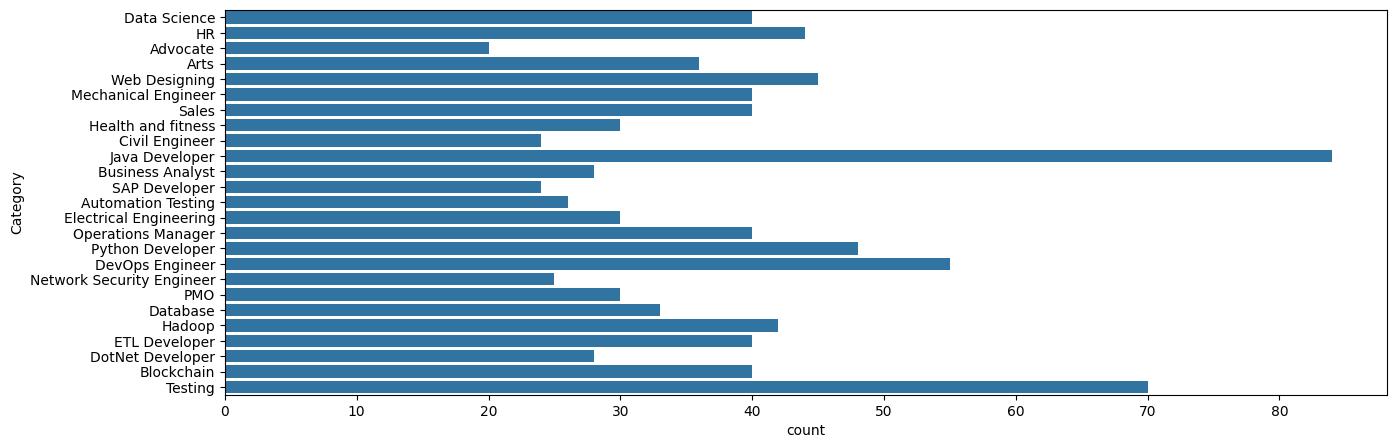

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(df['Category'])
plt.show()

In [ ]:
max_size = df['Category'].value_counts().max()
balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)

df = balanced_df.sample(frac=1).reset_index(drop=True)

print("\nBalanced Category Distribution (After Oversampling):")
print(df['Category'].value_counts())


Balanced Category Distribution (After Oversampling):
Category
Automation Testing           84
Hadoop                       84
Network Security Engineer    84
Python Developer             84
Data Science                 84
Blockchain                   84
Electrical Engineering       84
DevOps Engineer              84
Web Designing                84
Civil Engineer               84
Mechanical Engineer          84
Operations Manager           84
Arts                         84
DotNet Developer             84
Testing                      84
Health and fitness           84
Advocate                     84
Java Developer               84
ETL Developer                84
SAP Developer                84
Database                     84
Business Analyst             84
PMO                          84
Sales                        84
HR                           84
Name: count, dtype: int64


<ipython-input-20-4113c4b210a2>:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('Category').apply(lambda x: x.sample(max_size, replace=True)).reset_index(drop=True)


In [ ]:
df.shape

(2100, 2)

# 6. Hot Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

# 7. Vectorizing

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf.fit(df['Resume'])
X  = tfidf.transform(df['Resume'])

# 8. Splitting Of data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, df['Category'], test_size=0.2, random_state=42)

In [ ]:
X_train.shape, X_test.shape

((1680, 7846), (420, 7846))

# 9. Building Model

In [ ]:
from sklearn.svm import SVC

In [ ]:
X_train = X_train.toarray() if hasattr(X_train, 'toarray') else X_train
X_test = X_test.toarray() if hasattr(X_test, 'toarray') else X_test

In [ ]:
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)



SVC Results:


In [ ]:
print(f"Classification Report:\n{classification_report(y_test, y_pred_svc)}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        13
           2       0.94      1.00      0.97        15
           3       1.00      1.00      1.00        18
           4       1.00      1.00      1.00        16
           5       1.00      1.00      1.00        14
           6       1.00      1.00      1.00        26
           7       1.00      1.00      1.00        15
           8       1.00      0.93      0.97        15
           9       1.00      1.00      1.00        16
          10       1.00      1.00      1.00        26
          11       1.00      1.00      1.00        11
          12       1.00      1.00      1.00        21
          13       1.00      1.00      1.00        13
          14       1.00      1.00      1.00        18
          15       1.00      1.00      1.00        18
          16       1.00      1.00      1.00        18
    

<Axes: >

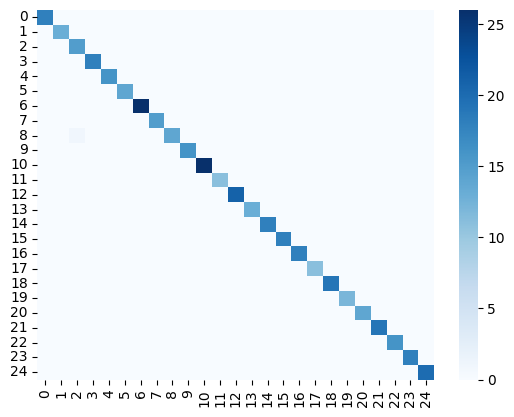

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_svc), cmap = 'Blues')

# 10. Exporting Stuff

In [ ]:
import pickle

In [ ]:
with open("tfidf.pkl", "wb") as f:
    pickle.dump(tfidf, f)

In [ ]:
with open("classifier.pkl", "wb") as f:
    pickle.dump(svc_model, f)